In [1]:
import numpy as np
import matplotlib.pyplot as plt

[ 0.89534884 -1.02325581]


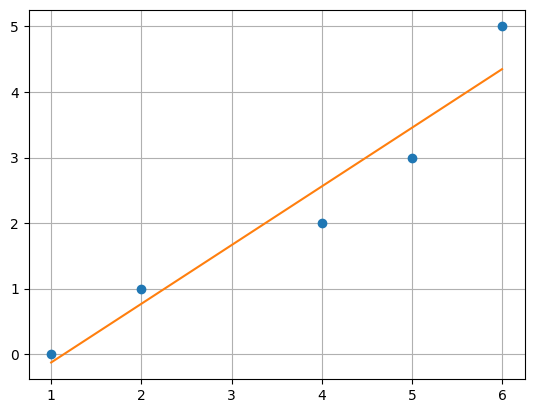

In [2]:
xs = np.array([1, 2, 4, 5, 6])
ys = np.array([0, 1, 2, 3, 5])

line_coefs = np.polyfit(xs, ys, 1)
print(line_coefs)
best_line = np.poly1d(line_coefs)

plt.plot(xs, ys, 'o')
plt.plot(xs, best_line(xs))
plt.grid()
plt.show()


### Solution 1. Calculus Math
Minimize
$$
L(a, b) = \sum_{i=1}^{n} (b + a \cdot x_i - y_i)^2
$$

This is a multivariate minimization problem; we can solve it by partial derivatives.

$$
\frac{\partial L}{\partial b} = 2 \sum_{i=1}^{n} (b + a \cdot x_i - y_i) = 0
$$

$$
\frac{\partial L}{\partial a} = 2 \sum_{i=1}^{n} x_i (b + a \cdot x_i - y_i) = 0
$$

This is a linear system for $a$ and $b$.

Let $S_x = \sum_{i=1}^{n} x_i$, $S_y = \sum_{i=1}^{n} y_i$, $S_{xx} = \sum_{i=1}^{n} x_i^2$, $S_{xy} = \sum_{i=1}^{n} x_i y_i$.

Then,
$$
b = \frac{S_{xx} S_y - S_x S_{xy}}{n S_{xx} - S_x^2}
$$

$$
a = \frac{n S_{xy} - S_x S_y}{n S_{xx} - S_x^2}
$$

In [3]:
n = len(xs)
s_x = np.sum(xs)
s_y = np.sum(ys)
s_xx = np.sum(xs**2)
s_xy = np.sum(xs*ys)

a = (n * s_xy - s_x * s_y) / (n * s_xx - s_x**2)
b = (s_y * s_xx - s_x * s_xy) / (n * s_xx - s_x**2)

print(a, b)

0.8953488372093024 -1.0232558139534884


### Solution 2. Linear Algebra

Formulate as a least squares problem.

In [4]:
A = np.stack((xs, np.ones_like(xs))).T
A

array([[1, 1],
       [2, 1],
       [4, 1],
       [5, 1],
       [6, 1]])

here we want 
$$
x^* = \argmin_x{|| Ax - b ||^2}
$$


[Moore-Penrose pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $A$ is
$$
A^+ = (A^T A)^{-1} A^T
$$

Then,
$$
x^* = A^+ b
$$

In [5]:
A_mp = np.linalg.pinv(A)  # Moore-Penrose pseudo-inverse
x_mp = A_mp @ ys
x_mp

array([ 0.89534884, -1.02325581])